8. Derivace funkce jedné proměnné

Zadání:
Numerická derivace je velice krátké téma. V hodinách jste se dozvěděli o nejvyužívanějších typech numerické derivace (dopředná, zpětná, centrální). Jedno z neřešených témat na hodinách byl problém volby kroku. V praxi je vhodné mít krok dynamicky nastavitelný. Algoritmům tohoto typu se říká derivace s adaptabilním krokem. Cílem tohoto zadání je napsat program, který provede numerickou derivaci s adaptabilním krokem pro vámi vybranou funkci. Proveďte srovnání se statickým krokem a analytickým řešením.


In [9]:
#vypocty derivaci
def forward_derivate(f, x0, k):
    return (f(x0+k) - f(x0))/k

def backward_derivate(f, x0, k):
    return (f(x0) - f(x0-k))/k

def central_derivate(f, x0, k):
    return (f(x0+k) - f(x0-k))/(2*k)

def forward_derivate_adaptive(f, x0, k_adaptive):
    return (f(x0+k_adaptive) - f(x0))/k_adaptive

def backward_derivate_adaptive(f, x0, k_adaptive):
    return (f(x0) - f(x0-k_adaptive))/k_adaptive

def central_derivate_adaptive(f, x0, k_adaptive):
    return (f(x0+k_adaptive) - f(x0-k_adaptive))/(2*k_adaptive)

#funkce a volba
f = lambda x: x**3 + 1
x0 = 4
k = 0.2
k_adaptive = float(input("Zadejte adaptivni krok: "))

#mezi vysledky
fode = forward_derivate(f, x0, k)
bade = backward_derivate(f, x0, k)
cede = central_derivate(f, x0, k)
fedead= forward_derivate_adaptive(f, x0, k_adaptive)
badead = backward_derivate_adaptive(f, x0, k_adaptive)
cedead = central_derivate_adaptive(f, x0, k_adaptive)

#vysledky
print(f"Bez kroku pro doprednou: {fode}, s krokem pro doprednou: {fedead}")
print(f"Bez kroku pro zpetnou: {bade}, s krokem pro doprednou: {badead}")
print(f"Bez kroku pro centralni: {cede}, s krokem pro doprednou: {cedead}")

Bez kroku pro dopřednou: 50.44000000000004, s krokem pro dopřednou: 61.0
Bez kroku pro zpětnou: 45.640000000000036, s krokem pro dopřednou: 37.0
Bez kroku pro centrální: 48.040000000000035, s krokem pro dopřednou: 49.0


9. Integrace funkce jedné proměnné

Zadání:
V oblasti přírodních a sociálních věd je velice důležitým pojmem integrál, který představuje funkci součtů malých změn (počet nakažených covidem za čas, hustota monomerů daného typu při posouvání se v řetízku polymeru, aj.). Integraci lze provádět pro velmi jednoduché funkce prostou Riemannovým součtem, avšak pro složitější funkce je nutné využít pokročilé metody. Vaším úkolem je vybrat si 3 různorodé funkce (polynom, harmonická funkce, logaritmus/exponenciála) a vypočíst určitý integrál na dané funkci od nějakého počátku do nějakého konečného bodu. Porovnejte, jak si každá z metod poradila s vámi vybranou funkcí na základě přesnosti vůči analytickému řešení.

In [15]:
import numpy as np
from numpy import *
from scipy import integrate

#funkce
def polynomial_function(x):
    return x**3 - 3*x + 7

def harmonic_function(x):
    return 2*sin(3*x) 

def logarithm_function(x):
    return log(6*x) + (2/3)

#funkce vypoctu 
def riemannuv_ctverec(funkce, a, b):
    return integrate.quadrature(funkce, a ,b)

def simpsonova_metoda(funkce, c, d, h=0.01):
    return integrate.simpson(funkce(np.arange(c, d+h, h)), np.arange(c, d+h, h))

def rombergova_metoda(funkce, e, f):
    return integrate.romberg(funkce, e, f)
 
#vysledky
print("Polynomicka funkce")
print(f"Pomoci Riemannova ctverce {riemannuv_ctverec(polynomial_function, 1, 2)[0]}")
print(f"Pomoci Simpsonovy metody {simpsonova_metoda(polynomial_function, 1, 2)}")
print(f"Pomoci Rombergovy metody {rombergova_metoda(polynomial_function, 1, 2)}")

print("\nHarmonicka funkce")
print(f"Pomoci Riemannova ctverce {riemannuv_ctverec(harmonic_function, 1, 2)[0]}")
print(f"Pomoci Simpsonovy metody {simpsonova_metoda(harmonic_function, 1, 2)}")
print(f"Pomoci Rombergovy metody {rombergova_metoda(harmonic_function, 1, 2)}")

print("\nLogaritmicka funkce")
print(f"Pomoci Riemannova ctverce {riemannuv_ctverec(logarithm_function, 1, 2)[0]}")
print(f"Pomoci Simpsonovy metody {simpsonova_metoda(logarithm_function, 1, 2)}")
print(f"Pomoci Rombergovy metody {rombergova_metoda(logarithm_function, 1, 2)}")

Polynomická funkce
Riemannuv ctverec 6.249999999999998
Simpsonova metoda 6.250000000000007
Rombergova metoda 6.25

Harmonická funkce
Riemannuv ctverec -1.300108522167793
Simpsonova metoda -1.3001085280183236
Rombergova metoda -1.3001085221676836

Logaritmická funkce
Riemannuv ctverec 2.844720497094347
Simpsonova metoda 2.8447204969174082
Rombergova metoda 2.844720497014345


1. Knihovny a moduly pro matematické výpočty

Zadání:
V tomto kurzu jste se učili s některými vybranými knihovnami. Některé sloužily pro rychlé vektorové operace jako NumPy, některé mají naprogramovány symbolické manipulace, které lze převést na numerické reprezentace (sympy), některé mají v sobě funkce pro numerickou integraci (scipy). Některé slouží i pro rychlé základní operace s čísly (numba).

Vaším úkolem je změřit potřebný čas pro vyřešení nějakého problému (např.: provést skalární součin, vypočítat určitý integrál) pomocí standardního pythonu a pomocí specializované knihovny. Toto měření proveďte alespoň pro 5 různých úloh (ne pouze jiná čísla, ale úplně jiné téma) a minimálně porovnejte rychlost jednoho modulu se standardním pythonem. Ideálně proveďte porovnání ještě s dalším modulem a snažte se, ať je kód ve standardním pythonu napsán efektivně.  


In [7]:
from sympy import *
import scipy.integrate as integrate
import numpy as np
from math import factorial
from time import process_time


#Nasobeni matice pomoci knihovny numpy
start = process_time()
matice = [[25, 1092, 2151], [60, 985, 1345], [5, 5456, 3541]]
vysledek = np.array(matice)*12
konec = process_time()

print("Pomoci knihovny Numpy:")
print(f"Matice je {vysledek} a vypocet trval: {(konec - start)} sekund")

#vlastni reseni 
start = process_time()
matice = [[25, 1092, 2151], [60, 985, 1345], [5, 5456, 3541]]
for i in range(len(matice)):
    for j in range(len(matice[0])):
        matice[i][j] = matice[i][j]*12
konec = process_time()

print("Vlastni reseni:")
print(f"Matice je {matice} a vypocet trval: {(konec - start)} sekund")


#Skalarni soucin pomoci knihovny numpy
start = process_time()
a = np.array([4, 2, 12])
b = np.array([2, 7, 17])
vysledek = sum(a*b)
konec = process_time()

print("Pomoci knihovny Numpy:")
print(f"Skalarni soucin je: {vysledek} a vypocet trval: {(konec - start)} sekund")

#vlastni reseni 
start = process_time()
vysledek = 0
a = (4, 2, 12)
b = (2, 7, 17)
for i in range(len(a)):
    vysledek += a[i]*b[i]
konec = process_time()

print("Vlastni reseni:")
print(f"Skalarni soucin je: {vysledek} a vypocet trval: {(konec - start)} sekund")
print("\n")


#Vypocet faktorialu pomoci knihovny math
start = process_time()
x = 142364
vysledek = factorial(x)
konec = process_time()
vysledek = str(vysledek)

print("Pomoci knihovny Math:")
print(f"Faktorial z cisla {x} je {vysledek[:10]} a vypocet trval: {(konec - start)} sekund")

#vlastni reseni
start = process_time()
x = 142364
vysledek = 1
for i in range(1, x+1):
    vysledek = vysledek * i 
konec = process_time()
vysledek = str(vysledek)

print("Vlastni reseni:")
print(f"Faktorial z cisla {x} je {vysledek[:10]} a vypocet trval: {(konec - start)} sekund")
print("\n")

 
#Integrace pomoci knihovny scipy
start = process_time()
vysledek = integrate.quad(lambda x: (3*x**2-6*x+3), 1, 5)
konec = process_time()

print("Pomoci knihovny Scipy:")
print(f"Vypocet integrace je: {vysledek[0]} a vypocet trval: {(konec - start)} sekund")

#vlastni reseni
def f(x):
    return (3*x**2-6*x+3)

start = process_time()
vysledek = 0
a = 1
b = 5
dx = 0.0001
while a < b:
    vysledek += dx * (f(a) + f((a+dx)))/2
    a += dx
konec = process_time()

print("Vlastni reseni:")
print(f"Vypocet integrace je: {vysledek} a vypocet trval: {(konec - start)} sekund")
print("\n")


#derivace pomoci knihovny sympy 
def derivace_sym(funkce, promenna, hodnota):
    promenna = symbols("x")
    derivace = diff(funkce, promenna)
    return (derivace.subs(x, hodnota)).doit()
    
start = process_time()
x = symbols('x')
funkce = 5*x**3-7*x**2+8*x-14
vysledek = derivace_sym(funkce, x, 7)

konec = process_time()

print("Pomoci knihovny Sympy:")
print(f"Derivace je {vysledek} a vypocet trval: {(konec - start)} sekund")

#vlastni reseni
def f(x):
    return 5*x**3-7*x**2+8*x-14

def derivace(funkce, hodnota, h=0.001):
    return (funkce(hodnota+h) - funkce(hodnota))/h

start = process_time()
vysledek = derivace(f, 7)
konec = process_time()

print("Vlastni reseni:")
print(f"Derivace je {vysledek} a vypocet trval: {(konec - start)} sekund")
print("\n")



Pomoci knihovny Numpy:
Matice je [[  300 13104 25812]
 [  720 11820 16140]
 [   60 65472 42492]] a vypocet trval: 0.0 sekund
Vlastni reseni:
Matice je [[300, 13104, 25812], [720, 11820, 16140], [60, 65472, 42492]] a vypocet trval: 0.0 sekund
Pomoci knihovny Numpy:
Skalarni soucin je: 226 a vypocet trval: 0.0 sekund
Vlastni reseni:
Skalarni soucin je: 226 a vypocet trval: 0.0 sekund


Pomoci knihovny Math:
Faktorial z cisla 142364 je 5491114898 a vypocet trval: 0.234375 sekund
Vlastni reseni:
Faktorial z cisla 142364 je 5491114898 a vypocet trval: 4.484375 sekund


Pomoci knihovny Scipy:
Vypocet integrace je: 64.0 a vypocet trval: 0.0 sekund
Vlastni reseni:
Vypocet integrace je: 64.00000002011676 a vypocet trval: 0.046875 sekund


Pomoci knihovny Sympy:
Derivace je 645 a vypocet trval: 0.0 sekund
Vlastni reseni:
Derivace je 645.0980050001363 a vypocet trval: 0.0 sekund




3. Úvod do lineární algebry

Zadání:
Důležitou částí studia na přírodovědecké fakultě je podobor matematiky zvaný lineární algebra. Poznatky tohoto oboru jsou základem pro oblasti jako zpracování obrazu, strojové učení nebo návrh mechanických soustav s definovanou stabilitou. Základní úlohou v lineární algebře je nalezení neznámých v soustavě lineárních rovnic. Na hodinách jste byli obeznámeni s přímou a iterační metodou pro řešení soustav lineárních rovnic. Vaším úkolem je vytvořit graf, kde na ose x bude velikost čtvercové matice a na ose y průměrný čas potřebný k nalezení uspokojivého řešení. Cílem je nalézt takovou velikost matice, od které je výhodnější využít iterační metodu.


Zvolena velikost ctvercove matice je : 5


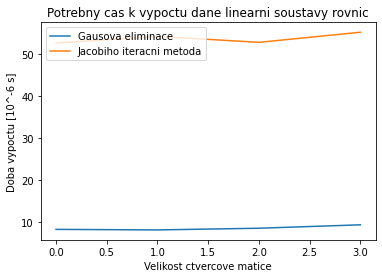

In [6]:
import numpy as np
from numpy import *
import time
import matplotlib.pyplot as plt

#Jacobiho metoda 
def jacobi(A, b, niteraci, x0):
    x = x0
    D = np.diag(A)
    L = np.tril(A, k = -1)
    U = np.triu(A, k = 1)
    for i in range(niteraci):
        x = (b - np.matmul((L + U),x))/D
        if (np.allclose(x, vysledek_gaus, rtol=1e-8, atol=1e-9,)) == True: 
            break
    return x

#Gausova metoda 
def gaus(A,b):
    x = np.linalg.solve(A, b)
    return x

casyG1 = [ ]
casyJ1 = [ ]
casyG2 = [ ]
casyJ2 = [ ]

#tvorba rady rovnic
h = input ("Zadejte velikost ctvercove matice = " ) 
print("Zvolena velikost ctvercove matice je :", h)
h = int(h)

for M in range (h-1):
    M = M + 2
    a = np.ones(M) 
    array
    
    #diagonalni matice
    A1 = np.diagflat([a])
    diag
    
    #jednotkova matice
    A2 = np.ones((M, M), dtype=int)
    array
   
    #jednotkova + diagonalni matice
    A = A1 + A2
    
    #tvorba matice prava strana
    b1 = np.ones(M)
    array
    b = b1*(M+1)
    
    #opakovani vypoctu
    for v in range (100):
        x0 = np.ones(len(A))
        
        #vypocty + cas pro Gausovu metodu
        gstart = time.perf_counter()
        vysledek_gaus = gaus(A,b)
        gend = time.perf_counter()
        g = gend - gstart
        g = round(1000000*g)
        
        #vypocty + cas pro Jacobiho metodu
        jstart = time.perf_counter()
        vysledek_jacobi = jacobi(A,b,100,x0)
        jend = time.perf_counter()
        j = jend - jstart
        j = round(1000000*j)
    
        casyG1.append(g)
        casyJ1.append(j)

    PG = mean(casyG1)
    PJ = mean(casyJ1)
    casyG1 = [ ]
    casyJ1 = [ ]
    casyG2.append(PG)   
    casyJ2.append(PJ)   

#vysledny graf
fig, ax = plt.subplots ()
line = plt.plot(casyG2, label = "Gausova eliminace")
line = plt.plot(casyJ2, label = "Jacobiho iteracni metoda")
plt.title(r"Potrebny cas k vypoctu dane linearni soustavy rovnic")
plt.xlabel('Velikost ctvercove matice')
plt.ylabel('Doba vypoctu [10^-6 s]')

ax.legend(loc=2)

plt.show() 


5. Hledání kořenů rovnice

Zadání:
Vyhledávání hodnot, při kterých dosáhne zkoumaný signál vybrané hodnoty je důležitou součástí analýzy časových řad. Pro tento účel existuje spousta zajímavých metod. Jeden typ metod se nazývá ohraničené (například metoda půlení intervalu), při kterých je zaručeno nalezení kořenu avšak metody typicky konvergují pomalu. Druhý typ metod se nazývá neohraničené, které konvergují rychle, avšak svojí povahou nemusí nalézt řešení (metody využívající derivace). Vaším úkolem je vybrat tři různorodé funkce (například polynomiální, exponenciální/logaritmickou, harmonickou se směrnicí, aj.), které mají alespoň jeden kořen a nalézt ho jednou uzavřenou a jednou otevřenou metodou. Porovnejte časovou náročnost nalezení kořene a přesnost nalezení. 


Opakovani pro presnost 0.001: 13
Koren pro funkci je 0.71190185546875
Funkcni hodnota v tomto bode je -0.6392051127699979


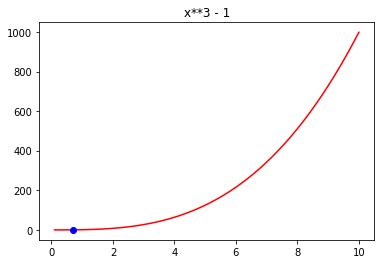

Opakovani pro presnost 0.001: 10
Koren pro funkci je 0.5491210937500001
Funkcni hodnota v tomto bode je -0.4479490887499552


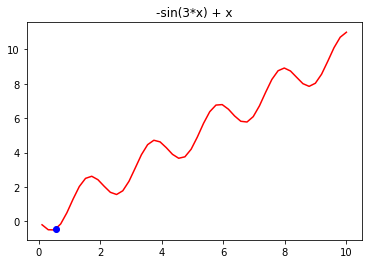

Opakovani pro presnost 0.001: 11
Koren pro funkci je 1.9990234375
Funkcni hodnota v tomto bode je -0.6146824398763271


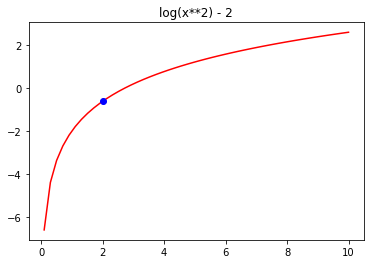

Opakovani pro presnost 0.001: 11
Koren pro funkci je 1.0000009147811104
Funkcni hodnota v tomto bode je 2.74434584168759e-06


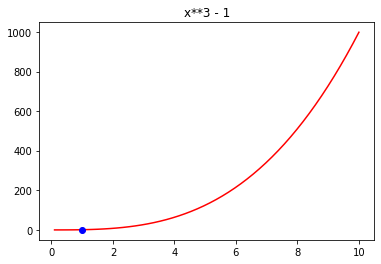

Opakovani pro presnost 0.001: 164379
Koren pro funkci je 0.7596221741281741
Funkcni hodnota v tomto bode je 3.7993566713856453e-06


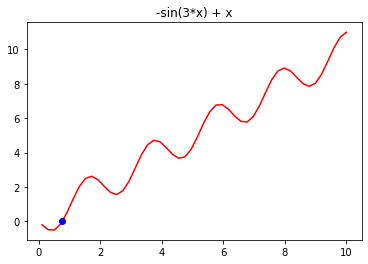

Opakovani pro presnost 0.001: 5
Koren pro funkci je 2.718280405091202
Funkcni hodnota v tomto bode je -1.0472558076290994e-06


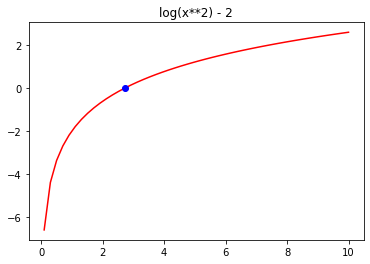

In [8]:
import numpy as np
from numpy import sin, log
import matplotlib.pyplot as plt
from scipy.misc import derivative

#Funkce
l1 = lambda x : x**3 - 1
l2 = lambda x : -sin(3*x) + x
l3 = lambda x : log(x**2) - 2

#Uzavrena metoda - bisekce, puleni intervalu
def uzavrena_metoda(funkce, min0, max0, presnost=0.001):
    opakovani = 0
    min, max = min0, max0
    while abs(max-min) > presnost:
        koren = (max + min)/2
        if funkce(min)*funkce(max) < 0:
            max = koren
        else:
            min = koren
        opakovani += 1
    print(f"Opakovani pro presnost 0.001: {opakovani}")
    return koren

def vysledekUM(funkce, min, max, koren, nazev):
    print(f"Koren pro funkci je {koren}")
    print(f"Funkcni hodnota v tomto bode je {funkce(koren)}")
    plt.plot(np.linspace(min, max), funkce(np.linspace(min, max)), "r")
    plt.plot(koren, funkce(koren), "bo")
    plt.title(nazev)
    plt.show()

vysledekUM(l1, 0.1, 10, uzavrena_metoda(l1, 0.1, 5), "x**3 - 1")
vysledekUM(l2, 0.1, 10, uzavrena_metoda(l2, 0.1, 1), "-sin(3*x) + x")
vysledekUM(l3, 0.1, 10, uzavrena_metoda(l3, 1, 3), "log(x**2) - 2")


#otevrena metoda - Newtonova metoda tecen (pomoci derivace)
def otevrena_metoda(funkce, bod, presnost=0.00001):
    opakovani = 0
    while abs(funkce(bod)) > presnost:
        koren = bod - (funkce(bod) / derivative(funkce, bod))
        bod = koren
        opakovani += 1
    koren = bod
    print(f"Opakovani pro presnost 0.001: {opakovani}")
    return koren


def vysledekOM(funkce, min, max, koren, nazev):
    print(f"Koren pro funkci je {koren}")
    print(f"Funkcni hodnota v tomto bode je {funkce(koren)}")
    plt.plot(np.linspace(min, max), funkce(np.linspace(min, max)), "r")
    plt.plot(koren, funkce(koren), "bo")
    plt.title(nazev)
    plt.show()

vysledekOM(l1, 0.1, 10, otevrena_metoda(l1, 2), "x**3 - 1")
vysledekOM(l2, 0.1, 10, otevrena_metoda(l2, 0.1), "-sin(3*x) + x")
vysledekOM(l3, 0.1, 10, otevrena_metoda(l3, 2), "log(x**2) - 2")